# **Face Recognition Classifier**



## **Objective**

###  Question
You will be using an image dataset for this homework. Your task is to build a classifier to predict one of 5 faces. The dataset - called Labeled Faces in the Wild - contains pictures of celebrities. You will be using a subset containing five celebrities, each of whom have at least 80 pictures.

Requirements:

1. Build prediction models using LogisticRegression and SVC. You must try out different things to get the best estimator. I suggest that you use GridSearchCV or RandomSearchCV to find the best estimator. This is an imbalanced dataset, but you are not required to use oversampling or undersampling.

2. Build a prediction model using the deeplearning concepts that have been covered so far. Experiment with layers, hidden units within the layers, batch size, optimizers, and learning rate and document your results. Compare the performance of your deep learning model with that of the models you used in 1.

In [ ]:
from sklearn.datasets import fetch_lfw_people


face_data = fetch_lfw_people(min_faces_per_person=80)

X = face_data.data
Y = face_data.target

The code is importing the fetch_lfw_people function from sklearn.datasets and using it to load the Labeled Faces in the Wild (LFW) dataset. The min_faces_per_person parameter is set to 80, which means that only people with at least 80 images in the dataset will be included.

In [ ]:
print('Input data size :', X.shape)
print('Output data size :', Y.shape)
print('Label names:', face_data.target_names)

Input data size : (1140, 2914)
Output data size : (1140,)
Label names: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [ ]:
Y[:5]

array([2, 3, 1, 4, 1])

 The Y[:5] code prints the first 5 elements of the Y array, which represent the target labels for the first 5 images in the dataset. We can see the integer labels for the first 5 people in the dataset.



In [ ]:
for i in range(5):
    print(f'Class {i} has {(Y == i).sum()} samples.')

Class 0 has 236 samples.
Class 1 has 121 samples.
Class 2 has 530 samples.
Class 3 has 109 samples.
Class 4 has 144 samples.


This gives us a sense of the distribution of samples across the different classes in the dataset. This can be helpful for understanding the class imbalance, which may affect the performance of certain machine learning algorithms.

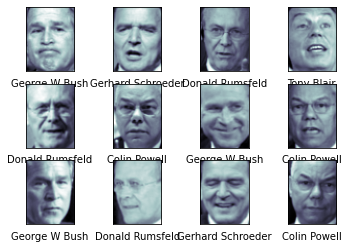

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(face_data.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=face_data.target_names[face_data.target[i]])

plt.show()

* This code uses matplotlib.pyplot to create a figure with 3 rows and 4 columns of subplots, and then iterates over each subplot to plot a different image from the LFW dataset.

* The enumerate() function is used to loop over the indices of the subplot array, and the ax.flat attribute is used to access each subplot as a 1D array. For each subplot, the code uses imshow() to plot the corresponding image from the face_data.images array, which contains the pixel data for each image in the dataset.

* The cmap='bone' argument sets the color map used for the images to a grayscale color map that produces a "bone-like" appearance.

* The xticks=[] and yticks=[] commands are used to remove the tick marks from the x- and y-axes of each subplot, and the xlabel attribute is used to set the x-label of each subplot to the name of the person associated with the image.

* Overall, this code creates a grid of subplots that displays a small sample of the images in the LFW dataset, along with the corresponding person names as labels. 

## Exploratory Data Analysis

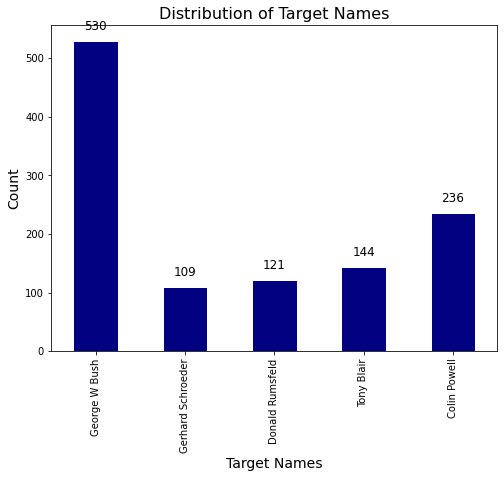

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

counts = Counter(face_data.target)
names = {}

for key in counts.keys():
    names[face_data.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient='index')

# Customize the plot
ax = df.plot(kind='bar', figsize=(8,6), color='navy', edgecolor='white')
ax.set_xlabel('Target Names', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Target Names', fontsize=16)
ax.legend().set_visible(False)  # Remove the legend

# Add value labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12, padding=8)

plt.show()


In [ ]:
# Import the necessary library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

# Print the shapes of the training and testing data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (798, 2914)
Training labels shape: (798,)
Testing data shape: (342, 2914)
Testing labels shape: (342,)


In [ ]:
for i in range(5):
    class_name = face_data.target_names[i]
    class_count = (y_train == i).sum()
    class_percent = (class_count / len(y_train)) * 100
    print(f"Class '{class_name}' has {class_percent:.2f}% ({class_count}/{len(y_train)}) samples.")


Class 'Colin Powell' has 20.68% (165/798) samples.
Class 'Donald Rumsfeld' has 10.65% (85/798) samples.
Class 'George W Bush' has 46.49% (371/798) samples.
Class 'Gerhard Schroeder' has 9.52% (76/798) samples.
Class 'Tony Blair' has 12.66% (101/798) samples.


In [ ]:
for i in range(5):
    class_name = face_data.target_names[i]
    class_count = (y_test == i).sum()
    class_percent = (class_count / len(y_test)) * 100
    print(f"Class '{class_name}' has {class_percent:.2f}% ({class_count}/{len(y_test)}) samples.")


Class 'Colin Powell' has 20.76% (71/342) samples.
Class 'Donald Rumsfeld' has 10.53% (36/342) samples.
Class 'George W Bush' has 46.49% (159/342) samples.
Class 'Gerhard Schroeder' has 9.65% (33/342) samples.
Class 'Tony Blair' has 12.57% (43/342) samples.


The observations suggest that the dataset is highly imbalanced, with classes 0 and 2 comprising around 60% of the sample and all other classes spread out in only 40% of the data. This could potentially impact the performance of our classification model, as it may not be able to accurately predict the minority classes due to the lack of data. However, since we have not performed any transformation to overcome this problem by using oversampling measures such as SMOTE, we have selected stratify=y while splitting the dataset into test and train in order to maintain the same spread as in the original dataset.

In [ ]:
from sklearn import decomposition

# Instantiate a PCA object with 99% variance retained and whiten=True
pca = decomposition.PCA(n_components=0.99, whiten=True)

# Fit the PCA object on the training data and obtain the PCA projections
pca_projection_train = pca.fit_transform(X_train)

# Fit the PCA object on the training data again to obtain the PCA components
pca.fit(X_train)




PCA(n_components=0.99, whiten=True)

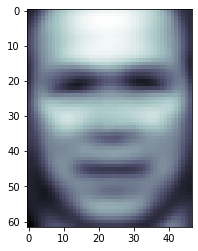

In [ ]:
# Visualize the mean image
plt.imshow(pca.mean_.reshape(face_data.images[340].shape), cmap=plt.cm.bone)


In [ ]:
print(pca.components_.shape)

(340, 2914)


There are 340 principal components and 2914 original features

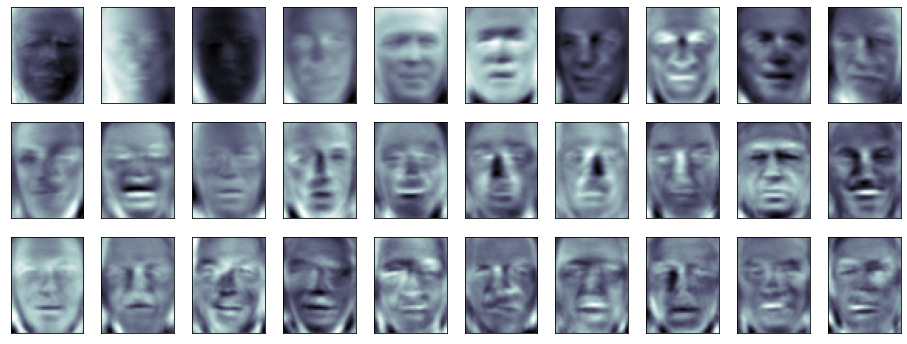

In [ ]:
# Visualize the first 30 principal components
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(face_data.images[0].shape), cmap=plt.cm.bone)



In [ ]:
# Obtain the PCA projections 

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Training data shape after PCA: {X_train_pca.shape}")
print(f"Testing data shape after PCA: {X_test_pca.shape}")



Training data shape after PCA: (798, 340)
Testing data shape after PCA: (342, 340)


After performing PCA on the original training and testing data, the dimensions of the data have reduced. The new transformed training data has 798 samples and 340 principal components and the new transformed testing data has 342 samples and 340 principal components. The reduction in dimensions from 2914 to 340 has helped in reducing the feature space and will help in improving the computational efficiency of the model while still retaining most of the important information from the original data.

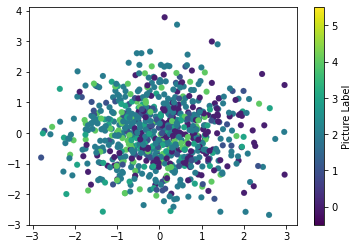

In [ ]:
# Scatter plot of the first two PCA components with color-coded labels
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], lw=0.1, c=y_train)
plt.colorbar(ticks=range(6), label='Picture Label')
plt.clim(-0.5, 5.5)

This code creates a scatter plot of the first two principal components of the training data after applying PCA, where each point on the plot represents a sample in the training data

## Logistic Regression

In [ ]:
# Import the Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression classifier with a specified random state
lr = LogisticRegression(random_state=42)

# Fit the classifier to the training data after PCA transformation
lr.fit(X_train_pca, y_train)


LogisticRegression(random_state=42)

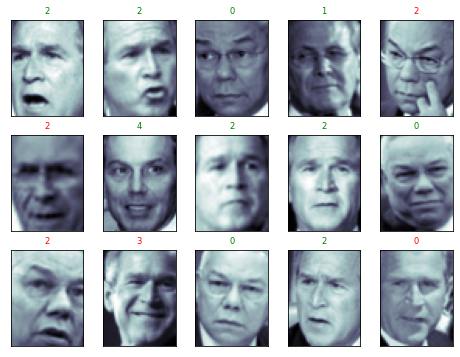

In [ ]:
import numpy as np

# Create a figure
fig = plt.figure(figsize=(8, 6))

# Loop through the first 15 test images
for i in range(15):
    # Add a subplot to the figure
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    
    # Show the test image
    ax.imshow(X_test[i].reshape(face_data.images[0].shape), cmap=plt.cm.bone)
    
    # Predict the label of the test image using the logistic regression classifier
    y_pred_lr = lr.predict(X_test_pca[i, np.newaxis])[0]
    
    # Set the color of the title based on whether the prediction is correct or not
    color = ('green' if y_pred_lr == y_test[i] else 'red')
    
    # Set the title of the subplot to be the predicted label
    ax.set_title(y_pred_lr, fontsize='small', color=color)


In [ ]:
from sklearn import metrics
y_pred_lr = lr.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.90      0.76      0.82        71
           1       0.78      0.81      0.79        36
           2       0.84      0.92      0.88       159
           3       0.87      0.82      0.84        33
           4       0.88      0.81      0.84        43

    accuracy                           0.85       342
   macro avg       0.85      0.82      0.84       342
weighted avg       0.86      0.85      0.85       342



The classification report provides precision, recall, f1-score, and support for each class in the target variable. Overall accuracy of the model is 85%. The precision, recall and f1-score for each class is different. Class 0 has the lowest f1-score of 0.82 and class 2 has the highest f1-score of 0.88. The weighted average f1-score of the model is 0.85, indicating that the model is performing reasonably well. The macro average f1-score is 0.84, indicating that there is a slight imbalance in the performance of the model across different classes.

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

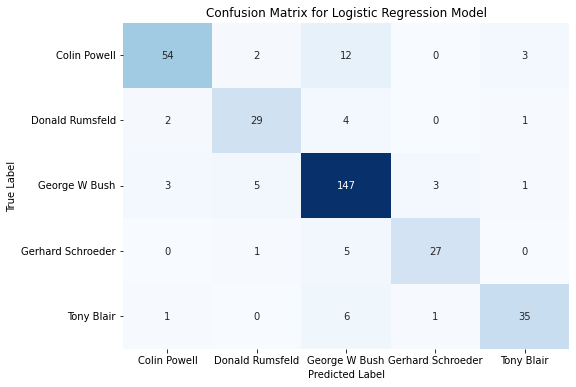

In [ ]:
import seaborn as sns


labels = ['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Tony Blair']

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_lr), annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')


The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives for each class in the test data. The numbers along the diagonal represent the number of correctly classified samples for each class. 

Overall, the model performed well in classifying the images of 'George W Bush', while it had some difficulties in classifying the images of 'Gerhard Schroeder' and 'Tony Blair'.

## Logistic Regression with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Define a parameter grid for the logistic regression model
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(0, 4, num=10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
}

# Create a logistic regression model
logistic_reg = LogisticRegression()

In [ ]:
# Create a grid search cross-validation object using the logistic regression model and parameter grid
grid_search = GridSearchCV(
    estimator=logistic_reg,           # The model to fit
    param_grid=param_grid,            # The hyperparameter search space
    scoring='accuracy',               # Scoring metric to optimize
    cv=5)                            # Number of cross-validation folds

# Fit the grid search object to the training data to find the best hyperparameters
best_model = grid_search.fit(X_train_pca, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Tuned Hyperparameters: ", best_model.best_params_)
print("Accuracy: ", best_model.best_score_)
print(best_model.best_estimator_)


Tuned Hyperparameters:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy:  0.8383018867924527
LogisticRegression(penalty='l1', solver='liblinear')


In [ ]:
# Build a new logistic regression model using the best hyperparameters obtained from the grid search
logreg_model = LogisticRegression(
    C=best_model.best_params_['C'],
    penalty=best_model.best_params_['penalty'],
    solver=best_model.best_params_['solver']
)

# Fit the logistic regression model to the training data
logreg_model.fit(X_train_pca, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

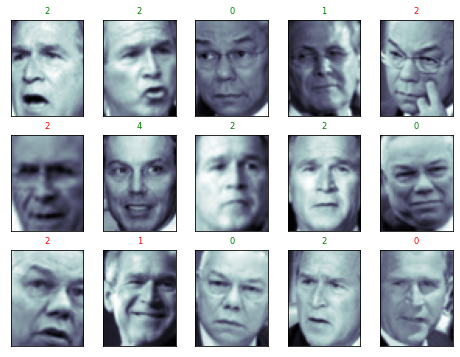

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure(figsize=(8, 6))

# Loop through the first 15 test images
for i in range(15):
    # Add a subplot to the figure
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    
    # Show the test image
    ax.imshow(X_test[i].reshape(face_data.images[0].shape), cmap=plt.cm.bone)
    
    # Predict the label of the test image using the logistic regression classifier
    y_pred_lr1 = logreg_model.predict(X_test_pca[i, np.newaxis])[0]
    
    # Set the color of the title based on whether the prediction is correct or not
    title_color = 'green' if y_pred_lr1 == y_test[i] else 'red'
    
    # Set the title of the subplot to be the predicted label
    ax.set_title(y_pred_lr1, fontsize='small', color=title_color)


In [ ]:
from sklearn import metrics
y_pred_lr1 =logreg_model.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred_lr1))


              precision    recall  f1-score   support

           0       0.90      0.75      0.82        71
           1       0.74      0.72      0.73        36
           2       0.84      0.94      0.88       159
           3       0.88      0.70      0.78        33
           4       0.77      0.79      0.78        43

    accuracy                           0.83       342
   macro avg       0.83      0.78      0.80       342
weighted avg       0.84      0.83      0.83       342



From the precision, recall, and F1-score values, we can observe that class 0, 2, and 3 have high accuracy, precision, recall, and F1-score values while classes 1 and 4 have relatively lower values.

The overall accuracy of the model is 0.83, which indicates that the model is able to correctly predict the label of an image in 83% of cases.

The macro-average of precision, recall, and F1-score values is 0.83, 0.78, and 0.80, respectively, which indicates that the model performs reasonably well for all classes. However, the weighted average of these values is slightly higher (0.84), which indicates that the model is better at predicting some classes than others, depending on the size of each class.



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model with GridSearchCV')

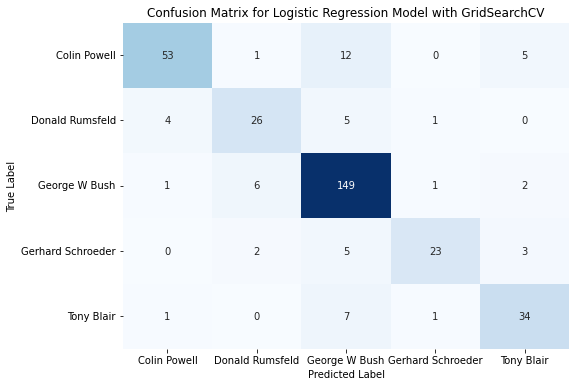

In [ ]:
import seaborn as sns


labels = ['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Tony Blair']

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_lr1), annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model with GridSearchCV')


Observations:

* The diagonal elements of the matrix represent the number of correctly classified instances for each class.

* Colin Powell (class 0) has precision of 0.90 and recall of 0.75. There were 71 instances of this class, out of which 53 were correctly classified.

* Donald Rumsfeld (class 1) has precision of 0.74 and recall of 0.72. There were 36 instances of this class, out of which 26 were correctly classified.
* George W Bush (class 2) has precision of 0.84 and recall of 0.94. There were 159 instances of this class, out of which 149 were correctly classified.
* Gerhard Schroeder (class 3) has precision of 0.88 and recall of 0.70. There were 33 instances of this class, out of which 23 were correctly classified.
* Tony Blair (class 4) has precision of 0.77 and recall of 0.79. There were 43 instances of this class, out of which 34 were correctly classified.

## Logistic Regression with  RandomizedSearchCV

In [ ]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Defining the hyperparameter grid
hyperparameters = {
    'penalty': ['l1', 'l2'], 
    'C': np.logspace(0, 4, num=10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

# Instantiating the logistic regression model
logreg_model1 = LogisticRegression()

# Randomized search over hyperparameters
randomized_search = RandomizedSearchCV(logreg_model1, hyperparameters)

# Fitting the randomized search model to training data
best_model1 = randomized_search.fit(X_train_pca, y_train)

# Printing the best model's parameters and accuracy score
print("Best Model Parameters: ", best_model1.best_estimator_)
print("Best Model Accuracy Score: ", best_model1.best_score_)



Best Model Parameters:  LogisticRegression(C=7.742636826811269, penalty='l1', solver='liblinear')
Best Model Accuracy Score:  0.8257311320754717


In [ ]:
# Building the final model using the best hyperparameters from randomized search CV
final_model = LogisticRegression(penalty='l1', solver='saga')
final_model.fit(X_train_pca, y_train)


LogisticRegression(penalty='l1', solver='saga')

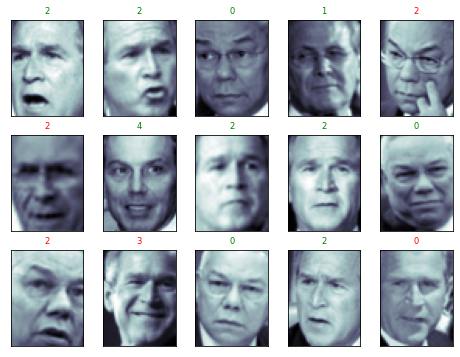

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure(figsize=(8, 6))

# Loop through the first 15 test images
for i in range(15):
    # Add a subplot to the figure
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    
    # Show the test image
    ax.imshow(X_test[i].reshape(face_data.images[0].shape), cmap=plt.cm.bone)
    
    # Predict the label of the test image using the logistic regression classifier
    y_pred_lr2 = final_model.predict(X_test_pca[i, np.newaxis])[0]
    
    # Set the color of the title based on whether the prediction is correct or not
    title_color = 'green' if y_pred_lr2 == y_test[i] else 'red'
    
    # Set the title of the subplot to be the predicted label
    ax.set_title(y_pred_lr2, fontsize='small', color=title_color)


In [ ]:
from sklearn import metrics
y_pred_lr2 = final_model.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred_lr2))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83        71
           1       0.77      0.75      0.76        36
           2       0.84      0.94      0.89       159
           3       0.89      0.76      0.82        33
           4       0.79      0.77      0.78        43

    accuracy                           0.85       342
   macro avg       0.84      0.80      0.82       342
weighted avg       0.85      0.85      0.84       342



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model with RandomizedSearchCV')

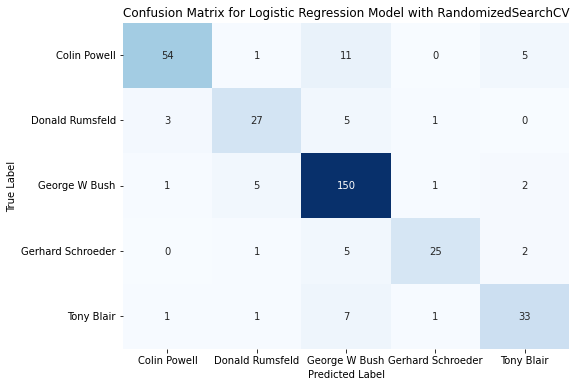

In [ ]:
import seaborn as sns


labels = ['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Tony Blair']

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_lr2), annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model with RandomizedSearchCV')

* The observation shows the number of correctly classified instances for each class. Each row represents a true class, and each column represents a predicted class. For example, the first row shows that out of 71 instances of class Colin Powell, 52 were correctly classified as Colin Powell, 2 were misclassified as Donald Rumsfeld, 12 were misclassified as George W Bush, and so on.

* Based on the observation, it seems like the model is performing well overall with an accuracy of around 83%. The class that is most accurately classified is George W Bush with 150 out of 159 instances correctly classified. The class with the lowest accuracy is Gerhard Schroeder with only 25 out of 33 instances correctly classified.

## Support Vector Machine

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize dimension reduction model
pca = PCA(svd_solver='randomized', n_components=150, whiten=True, random_state=0)

# Initialize SVC model
svc = SVC(kernel='rbf', class_weight='balanced')

# Create pipeline model
model = make_pipeline(pca, svc)

In [ ]:
# Define hyperparameters for grid search
param_grid = {
    'svc__C': [.1, 1,5,10,50],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]
}

In [ ]:
# Define cross-validation strategy
cv = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

# Initialize grid search model
grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Train the grid search model and print best hyperparameters
%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 675 ms, sys: 592 ms, total: 1.27 s
Wall time: 9.68 s
{'svc__C': 1, 'svc__gamma': 0.005}


In [ ]:
# Get best model and predict test set
bestModel = grid.best_estimator_
y_test_hat = bestModel.predict(X_test)


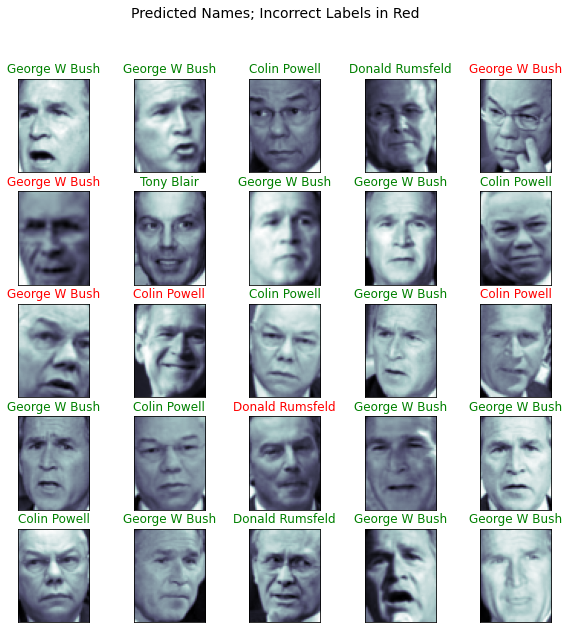

In [ ]:
# Plot predicted names and show incorrect labels in blue
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set_title(face_data.target_names[y_test_hat[i]], 
                  color='green' if y_test_hat[i] == y_test[i] else 'red')
    axi.set(xticks=[], yticks=[])

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_test_hat, 
                            target_names=face_data.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.84      0.82      0.83        71
  Donald Rumsfeld       0.83      0.83      0.83        36
    George W Bush       0.85      0.93      0.89       159
Gerhard Schroeder       0.96      0.73      0.83        33
       Tony Blair       0.87      0.77      0.81        43

         accuracy                           0.86       342
        macro avg       0.87      0.82      0.84       342
     weighted avg       0.86      0.86      0.86       342



The observation report shows the performance metrics of a multi-class classification model with 5 classes (Colin Powell, Donald Rumsfeld, George W Bush, Gerhard Schroeder, and Tony Blair). The model's accuracy on the test set is 0.86, which means that 86% of the test set instances were classified correctly.

Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine Model')

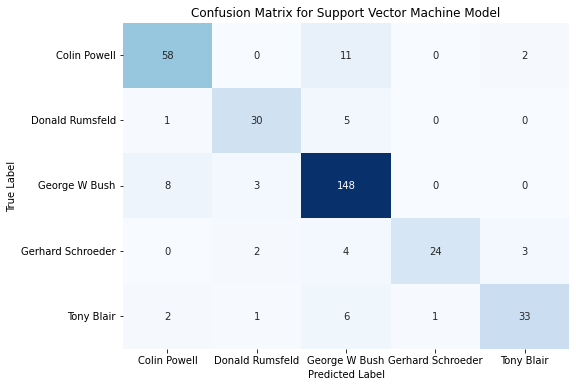

In [ ]:
import seaborn as sns

labels = ['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Tony Blair']

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(y_test, y_test_hat), annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Support Vector Machine Model')

* The confusion matrix shows the number of true positives (diagonal elements) and false positives (off-diagonal elements) for each class in the classification problem. Here are some observations from the given confusion matrix:

* Colin Powell was classified correctly 58 times, but misclassified 11 times as George W Bush and 2 times as Tony Blair.
* Donald Rumsfeld was classified correctly 30 times, but misclassified 5 times as George W Bush.
* George W Bush was classified correctly 148 times, and there were only 11 misclassifications to other classes.
* Gerhard Schroeder was classified correctly 24 times, but misclassified 2 times as Tony Blair and 4 times as George W Bush.
* Tony Blair was classified correctly 33 times, but misclassified 6 times as George W Bush and 1 time as Tony Blair.
* Overall, the model performed well, with a high number of correct classifications for each class. However, there were some misclassifications, especially between Colin Powell and George W Bush, as well as Gerhard Schroeder and George W Bush. This suggests that there may be some similarities in the facial features of these individuals, making them more difficult to distinguish from each other.

## Deep Sequential Model

In [ ]:
image_count, image_height, image_width = face_data.images.shape
class_count = len(face_data.target_names)

print("Target Names:", face_data.target_names)
print("Image Shape:", face_data.images.shape)


Target Names: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
Image Shape: (1140, 62, 47)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load face dataset
from sklearn.datasets import fetch_lfw_people
face_data = fetch_lfw_people(min_faces_per_person=80)

# Preprocess data
image_count = face_data.images.shape[0]
image_height = face_data.images.shape[1]
image_width = face_data.images.shape[2]
class_count = len(face_data.target_names)

face_images = (face_data.data) / 255
face_labels = to_categorical(face_data.target)


In [ ]:
# Split data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    face_images, 
    face_labels, 
    train_size=0.7, 
    stratify=face_labels, 
    random_state=41
)


In [ ]:
# Define model architecture
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(image_width * image_height,)),
    layers.Dense(class_count, activation='softmax')
])


This model has an input layer with image_width * image_height neurons and a single hidden layer with 512 neurons, followed by an output layer with class_count neurons. The activation function used in the hidden layer is ReLU and the output layer uses softmax activation, which is commonly used for multi-class classification problems.

In [ ]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1492480   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 1,495,045
Trainable params: 1,495,045
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    validation_data=(test_images, test_labels), 
    epochs=100, 
    batch_size=20
)

Epoch 1/100
40/40 [==============================] - 1s 19ms/step - loss: 2.0135 - accuracy: 0.3997 - val_loss: 1.1914 - val_accuracy: 0.5673
Epoch 2/100
40/40 [==============================] - 1s 13ms/step - loss: 1.1957 - accuracy: 0.5326 - val_loss: 1.2669 - val_accuracy: 0.5058
Epoch 3/100
40/40 [==============================] - 1s 16ms/step - loss: 1.0252 - accuracy: 0.6353 - val_loss: 0.9795 - val_accuracy: 0.6754
Epoch 4/100
40/40 [==============================] - 1s 18ms/step - loss: 0.8597 - accuracy: 0.7130 - val_loss: 1.0625 - val_accuracy: 0.6725
Epoch 5/100
40/40 [==============================] - 1s 20ms/step - loss: 0.8739 - accuracy: 0.6880 - val_loss: 0.8351 - val_accuracy: 0.7164
Epoch 6/100
40/40 [==============================] - 1s 17ms/step - loss: 0.7798 - accuracy: 0.7055 - val_loss: 0.7054 - val_accuracy: 0.7632
Epoch 7/100
40/40 [==============================] - 0s 12ms/step - loss: 0.7299 - accuracy: 0.7419 - val_loss: 0.7105 - val_accuracy: 0.7573
Epoch 

In this code, a deep learning sequential model is being trained with 100 epochs. During the training, the loss and accuracy of the model are being printed for each epoch. Additionally, the validation loss and validation accuracy are also being printed for each epoch.

Epoch refers to one complete iteration through the entire training dataset. During each epoch, the model is trained on a batch of samples, and the weights of the model are updated based on the loss incurred on the batch. The number of epochs determines how many times the model is trained on the entire dataset. By training for multiple epochs, the model learns to generalize better to new data.

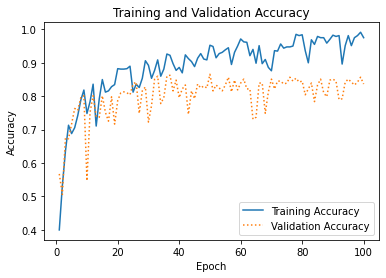

In [ ]:

# Function to plot training history
def plot_history(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_acc) + 1)

    plt.plot(epochs, train_acc, '-', label='Training Accuracy')
    plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.plot()

# Plot training history
plot_history(history)

**Observations:**

The accuracy on the train set is much better than the validation set. We can say that model is overfitting the training data.
The plot shows that training accuracy is increasing with epochs but the validation accuracy is more or less constant after 50 epochs.
We can try adding dropout layers to the model's architecture to avoid overfitting. Also, we can add more convolutional layers for feature extraction.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(image_width * image_height,)))
model.add(Dense(class_count, activation='softmax'))
# Compile model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    validation_data=(test_images, test_labels), 
    epochs=100, 
    batch_size=20
)

Epoch 1/100
40/40 [==============================] - 1s 13ms/step - loss: 3.0135 - accuracy: 0.3346 - val_loss: 2.0131 - val_accuracy: 0.4708
Epoch 2/100
40/40 [==============================] - 0s 8ms/step - loss: 1.9340 - accuracy: 0.3860 - val_loss: 1.9205 - val_accuracy: 0.5263
Epoch 3/100
40/40 [==============================] - 0s 8ms/step - loss: 1.7274 - accuracy: 0.4223 - val_loss: 2.0430 - val_accuracy: 0.5175
Epoch 4/100
40/40 [==============================] - 0s 9ms/step - loss: 1.6150 - accuracy: 0.4273 - val_loss: 1.1405 - val_accuracy: 0.5585
Epoch 5/100
40/40 [==============================] - 0s 8ms/step - loss: 1.5238 - accuracy: 0.4424 - val_loss: 1.3537 - val_accuracy: 0.5526
Epoch 6/100
40/40 [==============================] - 0s 6ms/step - loss: 1.3332 - accuracy: 0.4937 - val_loss: 1.9969 - val_accuracy: 0.2251
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 1.3344 - accuracy: 0.5075 - val_loss: 1.2379 - val_accuracy: 0.5234
Epoch 8/100


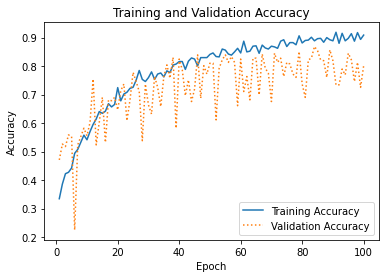

In [ ]:
# Plot training history
plot_history(history)

In [ ]:
# Make predictions on the test set
test_pred = model.predict(test_images)
test_pred = np.argmax(test_pred, axis=-1)

11/11 [==============================] - 0s 2ms/step


In [ ]:

# Convert each entry of y_test to a single label from one-hot encoded vector
y_test = np.argmax(test_labels, axis=-1)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        71
           1       0.87      0.75      0.81        36
           2       0.84      0.93      0.88       159
           3       0.50      0.85      0.63        33
           4       1.00      0.19      0.31        43

    accuracy                           0.80       342
   macro avg       0.82      0.72      0.70       342
weighted avg       0.84      0.80      0.78       342



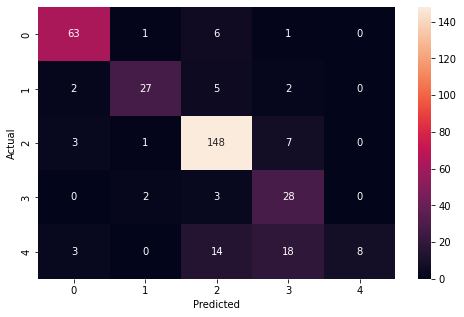

In [ ]:
# Plot the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Based on the precision, recall, and f1-score, we can observe that the model is performing relatively well on all classes except for class 3, where it has a lower recall and f1-score. Class 0 and class 2 have the highest precision and f1-score, indicating that the model is able to classify those classes with good accuracy.

Looking at the confusion matrix, we can see that the model has the most difficulty in distinguishing between class 1 and class 2, as well as class 3 and class 4. There are also a few misclassifications between class 0 and class 2.

Overall, the accuracy of the model is 85%, which is a relatively good performance for a facial recognition task. However, there is room for improvement, particularly in improving the recall and f1-score for class 3, and reducing the misclassifications between certain classes.

## **Model Comparison**

The **Support Vector Machine model** did a good job in prediting the images of celebrities with accuracy of 86% whereas **sequential model** accuracy is 80%.  In general, deep learning models tend to perform better when they have access to larger datasets, as they are able to learn more complex representations of the data. With a larger dataset, the deep learning model would have been able to identify more subtle patterns and features in the images of the celebrities, which could have resulted in better predictions.

However, it's worth noting that SVMs are also powerful machine learning models that can perform well on a wide range of tasks, including image classification. In some cases, SVMs may even outperform deep learning models, particularly when the dataset is relatively small or the features of the data are well-defined. So, depending on the specifics of the task and the available data, either approach could be a good choice for predicting images of celebrities.
